In [50]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statistics as stats
import seaborn as sns
import datetime
#from flask_sqlalchemy import SQLAlchemy
from sqlalchemy import create_engine
import sqlite3
from sqlite3 import Error
%matplotlib inline

In [2]:
engine = create_engine('sqlite://', echo=False)

In [3]:
def get_data(datelist):
    '''
    Returns a list of lists that contain data from the list of dates you give
    '''
    df_combined=[]
    if len(datelist)<1:
        print("Empty list")
    else:
        for date in datelist:
            df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(date))
            df_combined.append(df)
    return df_combined

def add_date_time(thedate,thetime):
    '''
    Returns the date and time added together to be put into a new column
    '''
    return thedate+" "+thetime

def uniqueness(item):
    '''
    Return the number of unique items and a list of unique items
    '''
    num=item.nunique()
    uni_list=item.unique()
    return num,uni_list

def convert_weekday(number):
    switcher={
        0:"Monday",
        1:"Tuesday",
        2:"Wednesday",
        3:"Thursday",
        4:"Friday",
        5:"Saturday",
        6:"Sunday",
    }
    
    return switcher.get(number,"nothing")

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


def create_connection(db_file):
    '''Create a database connection to an SQLite database'''
    conn=None
    try:
        conn=sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()
            

In [4]:
date1=[210605,210612,210619,210626,210703,210710,210717,210724,210731,210807,210814,210828,210904,210911,210918,210925,211002,211009,211016,211023,211030,211106,211113,211120,211127]
df=pd.concat(get_data(date1))
df['DATE_TIME']=add_date_time(df.DATE,df.TIME)
df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])
[num_unique,unique_list]=uniqueness(df['STATION'])
df.info()
print("Number of unique items {} and list of unique items \n {}".format(num_unique,unique_list))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244116 entries, 0 to 210188
Data columns (total 12 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   C/A                                                                   object        
 1   UNIT                                                                  object        
 2   SCP                                                                   object        
 3   STATION                                                               object        
 4   LINENAME                                                              object        
 5   DIVISION                                                              object        
 6   DATE                                                                  object        
 7   TIME                                                                  obj

In [5]:
df.to_sql('mta_ny',con=engine)

In [6]:
engine.execute("SELECT * FROM mta_ny").fetchall()

[(0, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/29/2021', '00:00:00', 'REGULAR', 7578734, 2590325, '2021-05-29 00:00:00.000000'),
 (1, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/29/2021', '04:00:00', 'REGULAR', 7578740, 2590327, '2021-05-29 04:00:00.000000'),
 (2, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/29/2021', '08:00:00', 'REGULAR', 7578749, 2590340, '2021-05-29 08:00:00.000000'),
 (3, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/29/2021', '12:00:00', 'REGULAR', 7578789, 2590386, '2021-05-29 12:00:00.000000'),
 (4, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/29/2021', '16:00:00', 'REGULAR', 7578897, 2590418, '2021-05-29 16:00:00.000000'),
 (5, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/29/2021', '20:00:00', 'REGULAR', 7579021, 2590439, '2021-05-29 20:00:00.000000'),
 (6, 'A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '05/30/2021', '00:00:00', 'REGULAR', 7579078, 2590451, '2021-05-

In [7]:
df = pd.read_sql('SELECT * FROM mta_ny;',engine)
df.drop(columns='index')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00.000000
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00.000000
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00.000000
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00.000000
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5244111,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,04:00:00,REGULAR,5554,835,2021-11-26 04:00:00.000000
5244112,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,08:00:00,REGULAR,5554,835,2021-11-26 08:00:00.000000
5244113,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,12:00:00,REGULAR,5554,836,2021-11-26 12:00:00.000000
5244114,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,16:00:00,REGULAR,5554,839,2021-11-26 16:00:00.000000


In [8]:
df.isna().any()

index                                                                   False
C/A                                                                     False
UNIT                                                                    False
SCP                                                                     False
STATION                                                                 False
LINENAME                                                                False
DIVISION                                                                False
DATE                                                                    False
TIME                                                                    False
DESC                                                                    False
ENTRIES                                                                 False
EXITS                                                                   False
DATE_TIME                                                       

In [9]:
[num_unique,unique_list]=uniqueness(df['LINENAME'])
print("Number of unique items {} and list of unique items \n {}".format(num_unique,unique_list))

Number of unique items 114 and list of unique items 
 ['NQR456W' 'NQRW' 'ACENQRS1237W' 'BDFMNQRW' 'NRW' 'LNQR456W' 'JNQRZ6W'
 'RNW' 'R1W' 'FJMZ' 'JZ' 'JZ456' 'ACJZ2345' 'BQ' 'S' 'S2345' 'BQS' 'Q'
 'R2345' 'R' 'BDNQR' 'BDNQR2345' 'DFGMNR' 'DNR' 'N' 'ND' 'D' 'DFNQ' 'FQ'
 'ACEL' 'FLM123' 'L' 'LG' 'LM' 'A' 'E' 'JMZ' 'JM' 'J' 'M' 'AC1' 'C' 'ABCD'
 'BC' 'ACBD' 'ABCD1' 'CE' 'ACENGRS1237W' 'ACE' 'ABCDEFM' 'ACE23'
 '2345ACJZ' 'AC' 'ACF' 'ACG' 'ACS' 'ACJLZ' 'AS' 'BD' 'BD4' 'BDE' 'EM'
 'EM6' 'EMG' 'EMR' 'MR' 'EFMR7' 'EFMR' 'EF' 'F' 'G' 'GL' 'BDFM' 'BDFM7'
 'FM' 'BDFQ6' 'FG' 'EJZ' '6' '1' '1RW' '23' '23ACE' '123' '123FLM'
 '123ACE' '1237ACENQRSW' '1237ACENQRS' '1ABCD' '1AC' '45' '456JZ' '6DF'
 '456LNQRW' '4567S' '456NQRW' '456' '245' '4BD' '4' '3' '25' '2' '7BDFM'
 '7' '7NQW' 'NQW' '7EFMR' '2345R' '2345' '2345BDNQR' '2345S' '34' '5']


In [10]:
[num_unique,unique_list]=uniqueness(df['STATION'])
df.info()
print("Number of unique items {} and list of unique items \n {}".format(num_unique,unique_list))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244116 entries, 0 to 5244115
Data columns (total 13 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   index                                                                 int64 
 1   C/A                                                                   object
 2   UNIT                                                                  object
 3   SCP                                                                   object
 4   STATION                                                               object
 5   LINENAME                                                              object
 6   DIVISION                                                              object
 7   DATE                                                                  object
 8   TIME                                                          

In [11]:
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
df

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00.000000
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00.000000
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00.000000
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00.000000
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244111,210184,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,04:00:00,REGULAR,5554,835,2021-11-26 04:00:00.000000
5244112,210185,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,08:00:00,REGULAR,5554,835,2021-11-26 08:00:00.000000
5244113,210186,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,12:00:00,REGULAR,5554,836,2021-11-26 12:00:00.000000
5244114,210187,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/26/2021,16:00:00,REGULAR,5554,839,2021-11-26 16:00:00.000000


In [12]:
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME", "DATE_TIME"],as_index=False)
                    .ENTRIES.first())
turnstiles_daily['DATE_TIME']=turnstiles_daily['DATE_TIME'].apply(pd.to_datetime)
turnstiles_daily.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
DATE                 object
TIME                 object
DATE_TIME    datetime64[ns]
ENTRIES               int64
dtype: object

In [13]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                   .apply(lambda grp: grp.shift(1)))

#drop null vallues row
turnstiles_daily.dropna(subset=['PREV_DATE'],axis=0, inplace=True)

turnstiles_daily

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/1717368573.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]


,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,05/29/2021,04:00:00,2021-05-29 04:00:00,7578740,2021-05-29 00:00:00,7578734.0
2,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2021-05-29 08:00:00,7578749,2021-05-29 04:00:00,7578740.0
3,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2021-05-29 12:00:00,7578789,2021-05-29 08:00:00,7578749.0
4,A002,R051,02-00-00,59 ST,05/29/2021,16:00:00,2021-05-29 16:00:00,7578897,2021-05-29 12:00:00,7578789.0
5,A002,R051,02-00-00,59 ST,05/29/2021,20:00:00,2021-05-29 20:00:00,7579021,2021-05-29 16:00:00,7578897.0
...,...,...,...,...,...,...,...,...,...,...
5243933,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,04:00:00,2021-11-26 04:00:00,5554,2021-11-26 00:00:00,5554.0
5243934,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,08:00:00,2021-11-26 08:00:00,5554,2021-11-26 04:00:00,5554.0
5243935,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,12:00:00,2021-11-26 12:00:00,5554,2021-11-26 08:00:00,5554.0
5243936,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,16:00:00,2021-11-26 16:00:00,5554,2021-11-26 12:00:00,5554.0


In [14]:
turnstiles_daily['WEEKDAY']=turnstiles_daily['DATE_TIME'].dt.weekday
turnstiles_daily['WEEKDAY']=turnstiles_daily['WEEKDAY'].apply(convert_weekday)
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,WEEKDAY
1,A002,R051,02-00-00,59 ST,05/29/2021,04:00:00,2021-05-29 04:00:00,7578740,2021-05-29 00:00:00,7578734.0,Saturday
2,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,2021-05-29 08:00:00,7578749,2021-05-29 04:00:00,7578740.0,Saturday
3,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,2021-05-29 12:00:00,7578789,2021-05-29 08:00:00,7578749.0,Saturday
4,A002,R051,02-00-00,59 ST,05/29/2021,16:00:00,2021-05-29 16:00:00,7578897,2021-05-29 12:00:00,7578789.0,Saturday
5,A002,R051,02-00-00,59 ST,05/29/2021,20:00:00,2021-05-29 20:00:00,7579021,2021-05-29 16:00:00,7578897.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
5243933,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,04:00:00,2021-11-26 04:00:00,5554,2021-11-26 00:00:00,5554.0,Friday
5243934,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,08:00:00,2021-11-26 08:00:00,5554,2021-11-26 04:00:00,5554.0,Friday
5243935,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,12:00:00,2021-11-26 12:00:00,5554,2021-11-26 08:00:00,5554.0,Friday
5243936,TRAM2,R469,00-05-01,RIT-ROOSEVELT,11/26/2021,16:00:00,2021-11-26 16:00:00,5554,2021-11-26 12:00:00,5554.0,Friday


In [15]:
#checking if counter is in reverse
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,WEEKDAY
41008,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,04:00:00,2021-05-29 04:00:00,885601736,2021-05-29 00:00:00,885601748.0,Saturday
41009,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,08:00:00,2021-05-29 08:00:00,885601726,2021-05-29 04:00:00,885601736.0,Saturday
41010,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,12:00:00,2021-05-29 12:00:00,885601699,2021-05-29 08:00:00,885601726.0,Saturday
41011,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,16:00:00,2021-05-29 16:00:00,885601658,2021-05-29 12:00:00,885601699.0,Saturday
41012,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,20:00:00,2021-05-29 20:00:00,885601601,2021-05-29 16:00:00,885601658.0,Saturday


In [16]:
#checking if counter is in revers part 2
mask = ((turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV") &
(turnstiles_daily["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_daily[mask].head()
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         1041
A013  R081  01-03-00  49 ST                 1
            01-06-01  49 ST                 1
A014  R081  02-00-00  49 ST                 1
A015  R081  00-00-02  49 ST                 1
                                         ... 
R622  R123  00-00-00  FRANKLIN AV        1057
R633  R068  00-00-01  VAN SICLEN AV         1
R646  R110  01-00-02  FLATBUSH AV-B.C       1
R730  R431  00-00-04  EASTCHSTER/DYRE     884
S101  R070  00-00-02  ST. GEORGE            8
Length: 366, dtype: int64

In [17]:
stations=['TIMES SQ-42 ST','WORLD TRADE CTR','125 ST','116 ST-COLUMBIA','137 ST CITY COL','W 4 ST-WASH SQ','68ST-HUNTER CO','FLATBUSH AV-B.C','34 ST-PENN STA', 'WALL ST','74 ST-BROADWAY','BROADWAY'
         'CHAMBERS ST','CITY HALL','14 ST-UNION SQ', '8 ST-NYU','UNION ST']
turnstiles_daily=pd.DataFrame(turnstiles_daily[turnstiles_daily['STATION'].isin(stations)])
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
turnstiles_daily.sample(10)

5671 4298891.0
0 117440512.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
55 11194856.0
38 8302412.0
11123659 4624026.0
5 11123659.0
1891101745 1104755.0
43 3154069.0
50362839 251769.0
114 1953573.0
11 3145979.0
34 1383110353.0


,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,WEEKDAY,DAILY_ENTRIES
3817259,R203,R043,00-00-01,WALL ST,05/31/2021,10:00:00,2021-05-31 10:00:00,71902,2021-05-31 06:00:00,71881.0,Monday,21.0
1432122,N072,R012,05-03-00,34 ST-PENN STA,11/11/2021,07:00:00,2021-11-11 07:00:00,4903878,2021-11-11 03:00:00,4903800.0,Thursday,78.0
132598,A034,R170,03-00-01,14 ST-UNION SQ,07/02/2021,21:00:00,2021-07-02 21:00:00,1245198,2021-07-02 17:00:00,1245070.0,Friday,128.0
81780,A021,R032,01-00-06,TIMES SQ-42 ST,10/29/2021,20:00:00,2021-10-29 20:00:00,2296220,2021-10-29 16:00:00,2296062.0,Friday,158.0
127907,A033,R170,02-00-04,14 ST-UNION SQ,10/10/2021,13:00:00,2021-10-10 13:00:00,7213863,2021-10-10 09:00:00,7213758.0,Sunday,105.0
3840692,R204,R043,02-06-01,WALL ST,08/13/2021,14:00:00,2021-08-13 14:00:00,84455399,2021-08-13 10:00:00,84455393.0,Friday,6.0
3703392,R174,R034,00-00-03,125 ST,10/12/2021,00:00:00,2021-10-12 00:00:00,4520562,2021-10-11 20:00:00,4520484.0,Tuesday,78.0
1402058,N067,R012,00-05-01,34 ST-PENN STA,08/27/2021,12:00:00,2021-08-27 12:00:00,1824109,2021-08-27 08:00:00,1823966.0,Friday,143.0
4159275,R246,R177,00-00-02,68ST-HUNTER CO,07/16/2021,09:00:00,2021-07-16 09:00:00,875439,2021-07-16 05:00:00,875416.0,Friday,23.0
208467,A047,R087,00-00-00,CITY HALL,08/09/2021,00:00:00,2021-08-09 00:00:00,40322,2021-08-08 20:00:00,40322.0,Monday,0.0


In [18]:
turnstiles_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420783 entries, 74614 to 5176954
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   C/A            420783 non-null  object        
 1   UNIT           420783 non-null  object        
 2   SCP            420783 non-null  object        
 3   STATION        420783 non-null  object        
 4   DATE           420783 non-null  object        
 5   TIME           420783 non-null  object        
 6   DATE_TIME      420783 non-null  datetime64[ns]
 7   ENTRIES        420783 non-null  int64         
 8   PREV_DATE      420783 non-null  datetime64[ns]
 9   PREV_ENTRIES   420783 non-null  float64       
 10  WEEKDAY        420783 non-null  object        
 11  DAILY_ENTRIES  420783 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 41.7+ MB


In [19]:
[num_unique,unique_list]=uniqueness(turnstiles_daily['STATION'])
turnstiles_daily.info()
print("Number of unique items {} and list of unique items \n {}".format(num_unique,unique_list))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420783 entries, 74614 to 5176954
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   C/A            420783 non-null  object        
 1   UNIT           420783 non-null  object        
 2   SCP            420783 non-null  object        
 3   STATION        420783 non-null  object        
 4   DATE           420783 non-null  object        
 5   TIME           420783 non-null  object        
 6   DATE_TIME      420783 non-null  datetime64[ns]
 7   ENTRIES        420783 non-null  int64         
 8   PREV_DATE      420783 non-null  datetime64[ns]
 9   PREV_ENTRIES   420783 non-null  float64       
 10  WEEKDAY        420783 non-null  object        
 11  DAILY_ENTRIES  420783 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 41.7+ MB
Number of unique items 15 and list of unique items 
 ['TIMES SQ-42 ST' '14

In [20]:
turnstiles_daily[turnstiles_daily['DAILY_ENTRIES']>100000]

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,WEEKDAY,DAILY_ENTRIES
1443534,N073,R013,02-00-04,34 ST-PENN STA,10/13/2021,16:00:00,2021-10-13 16:00:00,12,2021-10-13 12:00:00,177983.0,Wednesday,177971.0
1478791,N080,R138,00-00-00,W 4 ST-WASH SQ,07/20/2021,21:00:00,2021-07-20 21:00:00,83,2021-07-20 17:00:00,367525.0,Tuesday,367442.0
3471546,R137,R031,02-03-00,34 ST-PENN STA,08/22/2021,20:00:00,2021-08-22 20:00:00,7,2021-08-22 00:00:00,201369.0,Sunday,201362.0
3490086,R138,R293,00-05-00,34 ST-PENN STA,06/29/2021,22:00:00,2021-06-29 22:00:00,589899,2021-06-29 10:00:00,393607.0,Tuesday,196292.0
3500662,R141,R031,00-03-01,34 ST-PENN STA,07/09/2021,16:00:00,2021-07-09 16:00:00,9,2021-07-09 12:00:00,380650.0,Friday,380641.0
3530617,R147,R033,04-00-01,TIMES SQ-42 ST,11/16/2021,19:00:00,2021-11-16 19:00:00,193,2021-11-16 11:00:00,352533.0,Tuesday,352340.0
3843549,R204A,R043,03-06-00,WALL ST,08/23/2021,06:00:00,2021-08-23 06:00:00,50362839,2021-08-23 02:00:00,251769.0,Monday,251769.0
3927927,R221,R170,01-06-00,14 ST-UNION SQ,10/08/2021,16:05:09,2021-10-08 16:05:09,55,2021-10-07 13:00:00,222960.0,Friday,222905.0
4240792,R258,R132,00-00-00,125 ST,11/05/2021,21:00:00,2021-11-05 21:00:00,104,2021-11-05 17:00:00,152077.0,Friday,151973.0


In [21]:
turnstiles_daily['DAILY_ENTRIES'].sort_values(ascending=False)
#

3500662    380641.0
1478791    367442.0
3530617    352340.0
3843549    251769.0
3927927    222905.0
             ...   
1418676         0.0
1418675         0.0
1418674         0.0
3343826         0.0
1562655         0.0
Name: DAILY_ENTRIES, Length: 420783, dtype: float64

In [22]:
turnstiles_daily.to_csv('mta_ny_june_nov_daily_entries.csv')

In [23]:
#turnstiles_daily[(turnstiles_daily['DATE']=='10/08/2021') & (turnstiles_daily['DAILY_ENTRIES']>20000)]
stations=['TIMES SQ-42 ST','WORLD TRADE CTR','125 ST','116 ST-COLUMBIA','137 ST CITY COL','W 4 ST-WASH SQ','68ST-HUNTER CO','FLATBUSH AV-B.C','34 ST-PENN STA', 'WALL ST','74 ST-BROADWAY','BROADWAY'
         'CHAMBERS ST','CITY HALL','14 ST-UNION SQ', '8 ST-NYU','UNION ST']
turn_clean=pd.DataFrame(turnstiles_daily[turnstiles_daily['STATION'].isin(stations)])
#turn_clean[turn_clean['DAILY_ENTRIES']>20000]
turn_clean1=turn_clean.groupby(['DATE','WEEKDAY']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
turn_clean1

,DATE,WEEKDAY,count,sum
0,05/29/2021,Saturday,1980,92370.0
1,05/30/2021,Sunday,2368,92455.0
2,05/31/2021,Monday,2375,111207.0
3,06/01/2021,Tuesday,2372,182940.0
4,06/02/2021,Wednesday,2358,186436.0
...,...,...,...,...
170,11/22/2021,Monday,2421,245015.0
171,11/23/2021,Tuesday,2424,263269.0
172,11/24/2021,Wednesday,2422,242427.0
173,11/25/2021,Thursday,2414,117256.0


In [24]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday']
turn_weekday=turn_clean1[turn_clean1['WEEKDAY'].isin(weekdays)]

In [25]:
turn_weekday['AVE_DAILY_ENTRIES']=turn_weekday['sum']/turn_weekday['count']
turn_weekday

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/2016566017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turn_weekday['AVE_DAILY_ENTRIES']=turn_weekday['sum']/turn_weekday['count']


,DATE,WEEKDAY,count,sum,AVE_DAILY_ENTRIES
2,05/31/2021,Monday,2375,111207.0,46.824000
3,06/01/2021,Tuesday,2372,182940.0,77.124789
4,06/02/2021,Wednesday,2358,186436.0,79.065310
5,06/03/2021,Thursday,2370,184396.0,77.804219
6,06/04/2021,Friday,2414,180896.0,74.936205
...,...,...,...,...,...
170,11/22/2021,Monday,2421,245015.0,101.204048
171,11/23/2021,Tuesday,2424,263269.0,108.609323
172,11/24/2021,Wednesday,2422,242427.0,100.093724
173,11/25/2021,Thursday,2414,117256.0,48.573322


In [26]:
turn_weekday['NEW_DATE']=pd.to_datetime(turn_clean1['DATE'])
turn_weekday.dtypes

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/410161885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turn_weekday['NEW_DATE']=pd.to_datetime(turn_clean1['DATE'])


DATE                         object
WEEKDAY                      object
count                         int64
sum                         float64
AVE_DAILY_ENTRIES           float64
NEW_DATE             datetime64[ns]
dtype: object

In [27]:
mean_august=turn_weekday.loc[(turn_weekday['NEW_DATE']>='2021-08-01') & (turn_weekday['NEW_DATE']<='2021-08-31')].AVE_DAILY_ENTRIES.mean()
turn_weekday.loc[turn_weekday['DATE']=='2021-08-21'].AVE_DAILY_ENTRIES.replace(578.910305,mean_august,inplace=True)
print(mean_august)

87.21661318374717


In [28]:
#mean_month_august=turn_clean1.loc[(turn_clean1['DATE']>'2021-08-01') & (turn_clean1['DATE']<'2021-08-31')].AVE_DAILY_ENTRIES.mean()
first_day_of_week=turn_weekday[turn_weekday['WEEKDAY']=='Monday'].DATE
first_day_ave_daily_entries=turn_weekday[turn_weekday['WEEKDAY']=='Monday'].AVE_DAILY_ENTRIES
outlier_monday=turn_weekday[(turn_weekday['NEW_DATE']>='2021-08-23') & (turn_weekday['NEW_DATE']<='2021-08-30')].AVE_DAILY_ENTRIES.mean()
turn_weekday.loc[(turn_weekday['NEW_DATE']=='2021-08-23'),'AVE_DAILY_ENTRIES']=outlier_monday

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


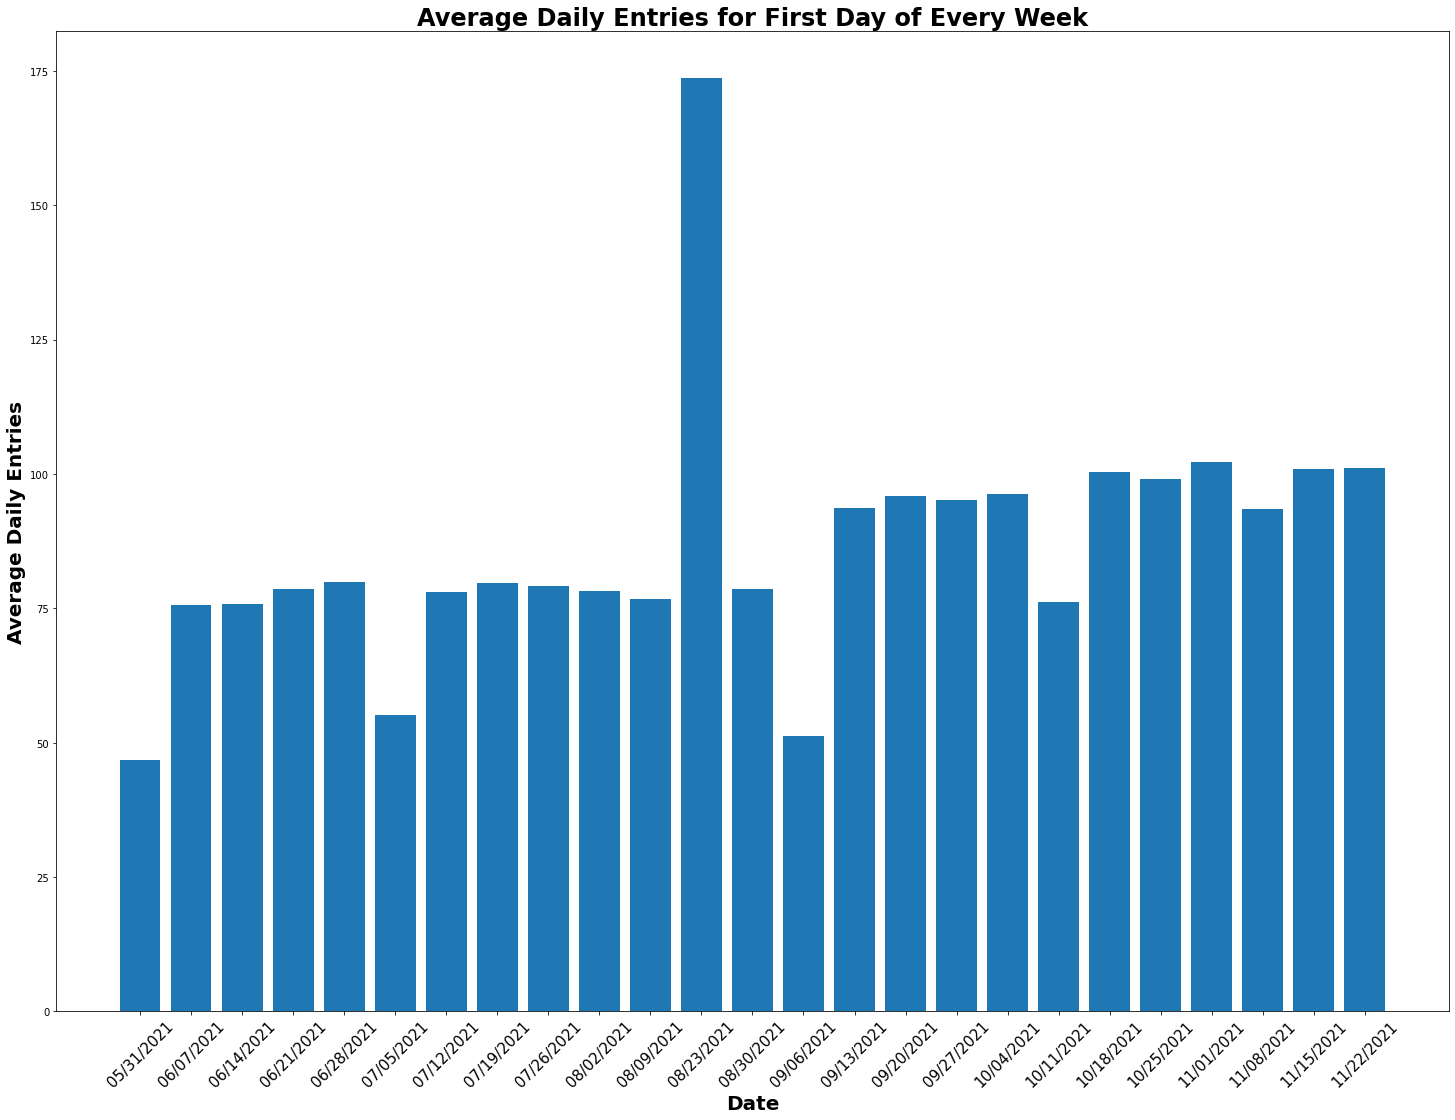

In [29]:
plt.figure(figsize=(20,15))
plt.bar(x=first_day_of_week,height=first_day_ave_daily_entries)
plt.xticks(rotation=45,fontsize=15)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=20)
plt.xlabel('Date',weight='bold',fontsize=20)
plt.title('Average Daily Entries for First Day of Every Week',weight='bold',fontsize=24)
plt.savefig('Average Daily Entries for First day of every week.jpg',bbox_inches='tight',dpi=300)
#only weekday averages are taken into account, weekends are excluded as we are targeting commuter traffic and specific demographics

In [30]:
#hide certain ticks or every other date, where the month starts off
#large data -> count in reverse -> negative differences/start at value too high 
#display first day of every month/fix calculation problem

In [31]:
stations=['TIMES SQ-42 ST','WORLD TRADE CTR','125 ST','116 ST-COLUMBIA','137 ST CITY COL','W 4 ST-WASH SQ','68ST-HUNTER CO','FLATBUSH AV-B.C','34 ST-PENN STA', 'WALL ST','74 ST-BROADWAY','BROADWAY'
         'CHAMBERS ST','CITY HALL','14 ST-UNION SQ', '8 ST-NYU','UNION ST']
turn_station=turn_clean.groupby(['STATION','DATE','WEEKDAY']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
turn_station['AVE_DAILY_ENTRIES']=turn_station['sum']/turn_station['count']
turn_station
#turn_station_1=pd.DataFrame(turn_station.groupby(['STATION','DATE','C/A','UNIT','SCP','DATE','TIME','DATE_TIME','WEEKDAY','ENTRIES','PREV_ENTRIES']).DAILY_ENTRIES.mean())
#turn_station_1.rename(columns={'DAILY_ENTRIES':'AVE_DAILY_ENTRIES'},inplace=True)
#turn_station_1

,STATION,DATE,WEEKDAY,count,sum,AVE_DAILY_ENTRIES
0,116 ST-COLUMBIA,05/29/2021,Saturday,30,1263.0,42.100000
1,116 ST-COLUMBIA,05/30/2021,Sunday,36,1231.0,34.194444
2,116 ST-COLUMBIA,05/31/2021,Monday,36,1363.0,37.861111
3,116 ST-COLUMBIA,06/01/2021,Tuesday,36,2884.0,80.111111
4,116 ST-COLUMBIA,06/02/2021,Wednesday,36,3093.0,85.916667
...,...,...,...,...,...,...
2620,WORLD TRADE CTR,11/22/2021,Monday,108,6535.0,60.509259
2621,WORLD TRADE CTR,11/23/2021,Tuesday,108,6604.0,61.148148
2622,WORLD TRADE CTR,11/24/2021,Wednesday,108,5928.0,54.888889
2623,WORLD TRADE CTR,11/25/2021,Thursday,108,2619.0,24.250000


In [32]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday']
turn_station1=turn_station[turn_station['WEEKDAY'].isin(weekdays)]
turn_station1['WEEKDAY']=pd.Categorical(
    turn_station1['WEEKDAY'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday'],
    ordered=True)
turn_station1.sort_values('WEEKDAY',inplace=True)
turn_station1


C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/340991111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turn_station1['WEEKDAY']=pd.Categorical(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,STATION,DATE,WEEKDAY,count,sum,AVE_DAILY_ENTRIES
2,116 ST-COLUMBIA,05/31/2021,Monday,36,1363.0,37.861111
1668,FLATBUSH AV-B.C,09/06/2021,Monday,120,3897.0,32.475000
961,68ST-HUNTER CO,08/30/2021,Monday,112,10051.0,89.741071
464,137 ST CITY COL,09/27/2021,Monday,60,5905.0,98.416667
2165,W 4 ST-WASH SQ,08/02/2021,Monday,114,10924.0,95.824561
...,...,...,...,...,...,...
965,68ST-HUNTER CO,09/03/2021,Friday,84,5703.0,67.892857
468,137 ST CITY COL,10/01/2021,Friday,60,6307.0,105.116667
2155,W 4 ST-WASH SQ,07/23/2021,Friday,114,13884.0,121.789474
447,137 ST CITY COL,09/10/2021,Friday,60,5294.0,88.233333


In [33]:
tuesday=turn_station1[turn_station1['WEEKDAY']=='Tuesday']
tuesday['NEW_DATE']=pd.to_datetime(tuesday['DATE'])
#tuesday[tuesday['AVE_DAILY_ENTRIES']>500]
tuesday.drop(index=[2152,1914],axis=0,inplace=True)
tuesday[tuesday['AVE_DAILY_ENTRIES']>500]
tuesday

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/497412246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday['NEW_DATE']=pd.to_datetime(tuesday['DATE'])
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,STATION,DATE,WEEKDAY,count,sum,AVE_DAILY_ENTRIES,NEW_DATE
1368,8 ST-NYU,10/26/2021,Tuesday,84,5120.0,60.952381,2021-10-26
1032,68ST-HUNTER CO,11/09/2021,Tuesday,84,12815.0,152.559524,2021-11-09
1256,8 ST-NYU,06/29/2021,Tuesday,84,3523.0,41.940476,2021-06-29
829,34 ST-PENN STA,10/12/2021,Tuesday,612,60403.0,98.697712,2021-10-12
1788,TIMES SQ-42 ST,07/06/2021,Tuesday,252,27146.0,107.722222,2021-07-06
...,...,...,...,...,...,...,...
507,137 ST CITY COL,11/09/2021,Tuesday,60,6444.0,107.400000,2021-11-09
500,137 ST CITY COL,11/02/2021,Tuesday,60,5588.0,93.133333,2021-11-02
738,34 ST-PENN STA,07/06/2021,Tuesday,606,51849.0,85.559406,2021-07-06
521,137 ST CITY COL,11/23/2021,Tuesday,60,6118.0,101.966667,2021-11-23


In [34]:
mask=(turn_station1['WEEKDAY']=='Tuesday')&(turn_station1['AVE_DAILY_ENTRIES'] > 500)
turn_station1[mask]
turn_station2=pd.DataFrame(turn_station1)
turn_station2.drop(index=[2152,1914],axis=0,inplace=True)
#drop 2 outliers that will impact the data

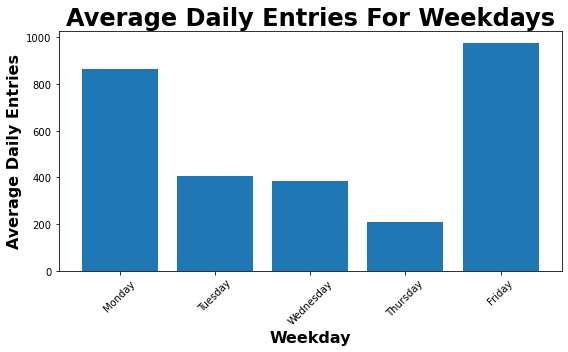

In [35]:
plt.figure(figsize=[8,5])
plt.bar(x=turn_station2['WEEKDAY'],height=turn_station2['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.xlabel('Weekday',weight='bold',fontsize=16)
plt.title('Average Daily Entries For Weekdays',weight='bold',fontsize=24)
#plt.plot(turn_station2['AVE_DAILY_ENTRIES'])

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig('Average Daily Entries-Weekday.jpg',bbox_inches='tight',dpi=300)

In [36]:
#electronic ads - specific time blocks to show them ads
#weekday - commuter traffic, weekend - not commuter traffic
#average weekday traffic
#find day of the week then take average of daily entries
turn_station2

,STATION,DATE,WEEKDAY,count,sum,AVE_DAILY_ENTRIES
2,116 ST-COLUMBIA,05/31/2021,Monday,36,1363.0,37.861111
1668,FLATBUSH AV-B.C,09/06/2021,Monday,120,3897.0,32.475000
961,68ST-HUNTER CO,08/30/2021,Monday,112,10051.0,89.741071
464,137 ST CITY COL,09/27/2021,Monday,60,5905.0,98.416667
2165,W 4 ST-WASH SQ,08/02/2021,Monday,114,10924.0,95.824561
...,...,...,...,...,...,...
965,68ST-HUNTER CO,09/03/2021,Friday,84,5703.0,67.892857
468,137 ST CITY COL,10/01/2021,Friday,60,6307.0,105.116667
2155,W 4 ST-WASH SQ,07/23/2021,Friday,114,13884.0,121.789474
447,137 ST CITY COL,09/10/2021,Friday,60,5294.0,88.233333


In [37]:
turn_clean1=turn_clean.groupby(['STATION']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
#turn_clean1=turn_clean1[turn_clean1['WEEKDAY'].isin(weekdays)]
turn_station3=pd.DataFrame(turn_clean1)
turn_station3['AVE_DAILY_ENTRIES']=(turn_clean1['sum']/turn_clean1['count'])
turn_station3.drop(columns=['count','sum'],inplace=True)
turn_station3.sort_values('AVE_DAILY_ENTRIES',ascending=False,inplace=True)
turn_station4=pd.DataFrame(turn_station3)
turn_station3
#turn_station4
#turn_station4.sort_values('AVE_DAILY_ENTRIES',ascending=False,inplace=True)
#turn_station3=turn_station2.groupby(['STATION']).AVE_DAILY_ENTRIES.sum().sort_values(ascending=False).reset_index()

,STATION,AVE_DAILY_ENTRIES
12,W 4 ST-WASH SQ,139.775284
3,14 ST-UNION SQ,132.938782
1,125 ST,120.926897
0,116 ST-COLUMBIA,116.956196
10,TIMES SQ-42 ST,112.262610
5,68ST-HUNTER CO,90.906280
4,34 ST-PENN STA,89.884726
2,137 ST CITY COL,81.038172
11,UNION ST,75.286442
9,FLATBUSH AV-B.C,60.679519


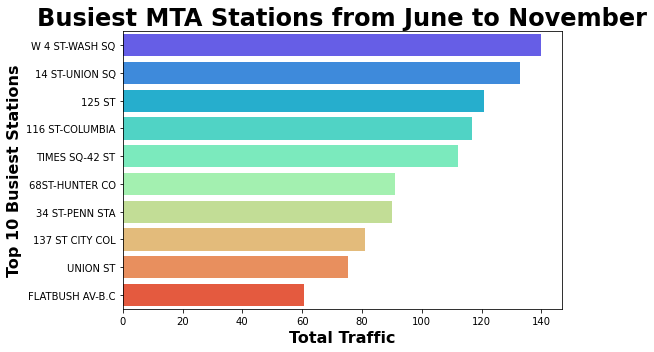

In [38]:
#fig, ax=plt.subplots(1,2,figsize=(8,5))
#fig.tight_layout()
plt.figure(figsize=[8,5])
#plt.subplot(1,2,1)
#plt.bar(x=turn_station2['STATION'],height=turn_station2['AVE_DAILY_ENTRIES'])
sns.barplot(data=turn_station3.head(10),x='AVE_DAILY_ENTRIES',y='STATION',palette='rainbow')
plt.xlabel('Total Traffic',weight='bold',fontsize=16)
plt.ylabel('Top 10 Busiest Stations',weight='bold',fontsize=16)
plt.title('Busiest MTA Stations from June to November',weight='bold',fontsize=24)
#plt.plot(turn_station2['AVE_DAILY_ENTRIES'])


#plt.subplot(1,2,2)
#plt.hist(turn_station2['AVE_DAILY_ENTRIES'])
#plt.title("Histogram of Average Daily Entries")
#plt.ylabel('Average Daily Entries')
#plt.xlabel('Values')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig('Average Daily Entries-Station.jpg',bbox_inches='tight',dpi=300)
# WASH_SQ, UNION_SQ, 125_ST, ST_COLUMBIA, TIMES_SQ_42_ST

In [39]:
#Selected stations with target demographics
#mention that chose stations at a point where most of these demographics were located at
#plot weekday average daily entries against station

In [40]:
#station_1=turn_clean.groupby(['STATION','DATE','TIME','WEEKDAY']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
#weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday']
#station_1=station_1[station_1['WEEKDAY'].isin(weekdays)]
#station_1['AVE_DAILY_ENTRIES_TB']=station_1['sum']/station_1['count']
#station_1

In [41]:

stations=['TIMES SQ-42 ST','WORLD TRADE CTR','125 ST','116 ST-COLUMBIA','137 ST CITY COL','W 4 ST-WASH SQ','68ST-HUNTER CO','FLATBUSH AV-B.C','34 ST-PENN STA', 'WALL ST','74 ST-BROADWAY','BROADWAY'
         'CHAMBERS ST','CITY HALL','14 ST-UNION SQ', '8 ST-NYU','UNION ST']
mask1=(turn_station2['STATION']=='14 ST-UNION SQ')
#plt.bar(x=station_1[mask1],height=turn_station2['AVE_DAILY_ENTRIES'])
station2=turn_station2[mask1]
mask_station=(mask1 & (station2['AVE_DAILY_ENTRIES'] > 500))
station2[mask_station]
station2['WEEKDAY']=pd.Categorical(
    station2['WEEKDAY'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday'],
    ordered=True)
station2.sort_values('WEEKDAY',inplace=True)
#station2

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/2423823315.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  station2[mask_station]
C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/2423823315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['WEEKDAY']=pd.Categorical(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [42]:
station2[(station2['WEEKDAY']=='Friday') & (station2['AVE_DAILY_ENTRIES']>500)]
#2021-08-09 to 2021-08-13
station2['NEW_DATE']=pd.to_datetime(station2['DATE'])
date_mask= (station2['NEW_DATE'] >= '2021-10-04') & (station2['NEW_DATE']<='2021-10-08')
outlier_date=station2[date_mask].AVE_DAILY_ENTRIES.mean()
station2.loc[(station2['NEW_DATE']=='2021-10-08'),'AVE_DAILY_ENTRIES']=outlier_date

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/3857429857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['NEW_DATE']=pd.to_datetime(station2['DATE'])
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


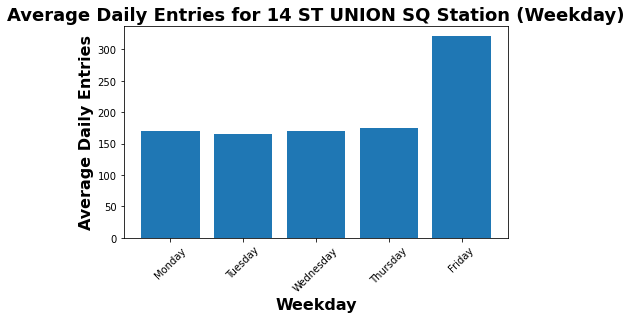

In [43]:
#plt.figure(figsize=(20,15))
plt.bar(x=station2['WEEKDAY'],height=station2['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.xlabel('Weekday',weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries for 14 ST UNION SQ Station (Weekday)',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries-Station 14 ST UNION SQ.jpg',bbox_inches='tight',dpi=300)

In [44]:

mask2=(turn_station2['STATION']=='125 ST')
#plt.bar(x=station_1[mask1],height=turn_station2['AVE_DAILY_ENTRIES'])
station2=turn_station2[mask2]
mask_station=(mask2 & (station2['AVE_DAILY_ENTRIES'] > 50))
#index 2354
station2[(station2['WEEKDAY']=='Friday') & (station2['AVE_DAILY_ENTRIES']>500)]
#2021-08-09 to 2021-08-13
station2['NEW_DATE']=pd.to_datetime(station2['DATE'])
date_mask= (station2['NEW_DATE'] >= '2021-11-01') & (station2['NEW_DATE']<='2021-11-05')
outlier_date=station2[date_mask].AVE_DAILY_ENTRIES.mean()
station2.loc[(station2['NEW_DATE']=='2021-11-05'),'AVE_DAILY_ENTRIES']=outlier_date
outlier_date

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/1474727644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['NEW_DATE']=pd.to_datetime(station2['DATE'])


259.0992248062015

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/771581436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['WEEKDAY']=pd.Categorical(


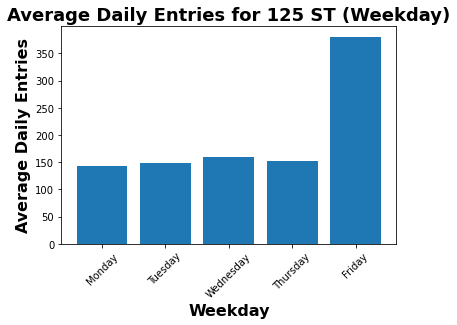

In [45]:
station2['WEEKDAY']=pd.Categorical(
    station2['WEEKDAY'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday'],
    ordered=True)

station2.sort_values('WEEKDAY',inplace=True)
plt.bar(x=station2['WEEKDAY'],height=station2['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.xlabel('Weekday',weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries for 125 ST (Weekday)',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries-Station 125 ST.jpg',bbox_inches='tight',dpi=300)

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/2199345142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['WEEKDAY']=pd.Categorical(


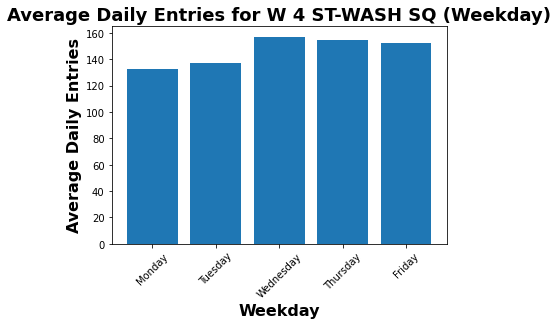

In [46]:
mask2=(turn_station2['STATION']=='W 4 ST-WASH SQ')
#plt.bar(x=station_1[mask1],height=turn_station2['AVE_DAILY_ENTRIES'])
station2=turn_station2[mask2]
mask_station=(mask2 & (station2['AVE_DAILY_ENTRIES'] > 50))
#index 2354
station2[(station2['AVE_DAILY_ENTRIES']>500)]
station2['WEEKDAY']=pd.Categorical(
    station2['WEEKDAY'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday'],
    ordered=True)

station2.sort_values('WEEKDAY',inplace=True)
plt.bar(x=station2['WEEKDAY'],height=station2['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.xlabel('Weekday',weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries for W 4 ST-WASH SQ (Weekday)',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries-Station W 4 ST-WASH SQ.jpg',bbox_inches='tight',dpi=300)

#station2['NEW_DATE']=pd.to_datetime(station2['DATE'])
#date_mask= (station2['NEW_DATE'] >= '2021-11-01') & (station2['NEW_DATE']<='2021-11-05')
#outlier_date=station2[date_mask].AVE_DAILY_ENTRIES.mean()
#station2.loc[(station2['NEW_DATE']=='2021-11-05'),'AVE_DAILY_ENTRIES']=outlier_date
#outlier_date

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/2091121120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['WEEKDAY']=pd.Categorical(


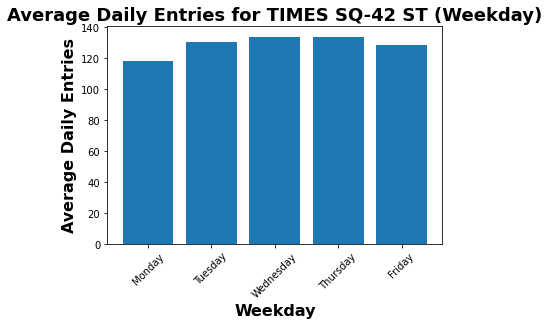

In [47]:
mask2=(turn_station2['STATION']=='TIMES SQ-42 ST')
#plt.bar(x=station_1[mask1],height=turn_station2['AVE_DAILY_ENTRIES'])
station2=turn_station2[mask2]
station2
station2.sort_values('WEEKDAY',inplace=True)
station2['WEEKDAY']=pd.Categorical(
    station2['WEEKDAY'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday'],
    ordered=True)

station2.sort_values('WEEKDAY',inplace=True)
plt.bar(x=station2['WEEKDAY'],height=station2['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.xlabel('Weekday',weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries for TIMES SQ-42 ST (Weekday)',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries-Station TIMES SQ-42 ST.jpg',bbox_inches='tight',dpi=300)

C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/1137735184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station2['WEEKDAY']=pd.Categorical(


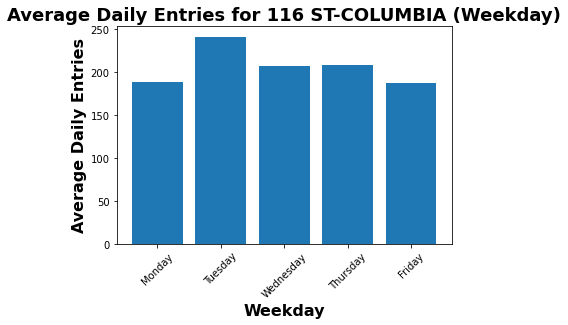

In [48]:
mask2=(turn_station2['STATION']=='116 ST-COLUMBIA')
#plt.bar(x=station_1[mask1],height=turn_station2['AVE_DAILY_ENTRIES'])
station2=turn_station2[mask2]
station2
station2.sort_values('WEEKDAY',inplace=True)
station2['WEEKDAY']=pd.Categorical(
    station2['WEEKDAY'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday'],
    ordered=True)

station2.sort_values('WEEKDAY',inplace=True)
plt.bar(x=station2['WEEKDAY'],height=station2['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.xlabel('Weekday',weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries for 116 ST-COLUMBIA (Weekday)',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries-Station 116 ST-COLUMBIA.jpg',bbox_inches='tight',dpi=300)

In [49]:
turn_clean

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,WEEKDAY,DAILY_ENTRIES
74614,A021,R032,01-00-00,TIMES SQ-42 ST,05/29/2021,04:00:00,2021-05-29 04:00:00,9986348,2021-05-29 00:00:00,9986327.0,Saturday,21.0
74615,A021,R032,01-00-00,TIMES SQ-42 ST,05/29/2021,08:00:00,2021-05-29 08:00:00,9986378,2021-05-29 04:00:00,9986348.0,Saturday,30.0
74616,A021,R032,01-00-00,TIMES SQ-42 ST,05/29/2021,12:00:00,2021-05-29 12:00:00,9986463,2021-05-29 08:00:00,9986378.0,Saturday,85.0
74617,A021,R032,01-00-00,TIMES SQ-42 ST,05/29/2021,16:00:00,2021-05-29 16:00:00,9986596,2021-05-29 12:00:00,9986463.0,Saturday,133.0
74618,A021,R032,01-00-00,TIMES SQ-42 ST,05/29/2021,20:00:00,2021-05-29 20:00:00,9986780,2021-05-29 16:00:00,9986596.0,Saturday,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5176950,R647,R110,02-06-00,FLATBUSH AV-B.C,11/26/2021,04:00:00,2021-11-26 04:00:00,4604307,2021-11-26 00:00:00,4604307.0,Friday,0.0
5176951,R647,R110,02-06-00,FLATBUSH AV-B.C,11/26/2021,08:00:00,2021-11-26 08:00:00,4604317,2021-11-26 04:00:00,4604307.0,Friday,10.0
5176952,R647,R110,02-06-00,FLATBUSH AV-B.C,11/26/2021,12:00:00,2021-11-26 12:00:00,4604325,2021-11-26 08:00:00,4604317.0,Friday,8.0
5176953,R647,R110,02-06-00,FLATBUSH AV-B.C,11/26/2021,16:00:00,2021-11-26 16:00:00,4604330,2021-11-26 12:00:00,4604325.0,Friday,5.0


In [50]:
station3=turn_clean.groupby(['STATION','DATE','WEEKDAY','TIME']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
station3['AVE_DAILY_ENTRIES']=station3['sum']/station3['count']
station3

,STATION,DATE,WEEKDAY,TIME,count,sum,AVE_DAILY_ENTRIES
0,116 ST-COLUMBIA,05/29/2021,Saturday,05:00:00,6,18.0,3.000000
1,116 ST-COLUMBIA,05/29/2021,Saturday,09:00:00,6,93.0,15.500000
2,116 ST-COLUMBIA,05/29/2021,Saturday,13:00:00,6,276.0,46.000000
3,116 ST-COLUMBIA,05/29/2021,Saturday,17:00:00,6,538.0,89.666667
4,116 ST-COLUMBIA,05/29/2021,Saturday,21:00:00,6,338.0,56.333333
...,...,...,...,...,...,...,...
19035,WORLD TRADE CTR,11/26/2021,Friday,07:00:00,18,114.0,6.333333
19036,WORLD TRADE CTR,11/26/2021,Friday,11:00:00,18,493.0,27.388889
19037,WORLD TRADE CTR,11/26/2021,Friday,15:00:00,18,1521.0,84.500000
19038,WORLD TRADE CTR,11/26/2021,Friday,19:00:00,18,2040.0,113.333333


C:\Users\hancc\AppData\Local\Temp/ipykernel_27864/1833521501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station3['NEW_DATE']=pd.to_datetime(station3['DATE'])
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

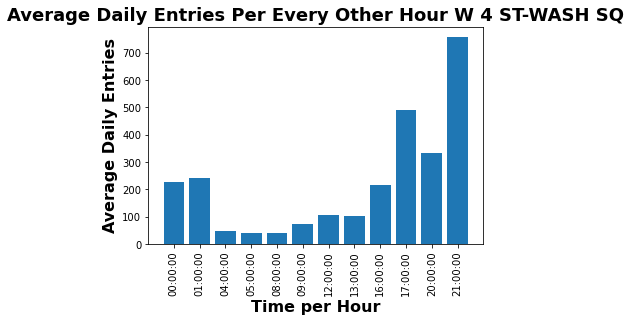

In [51]:
#'W 4 ST-WASH SQ'
station3=station3[station3['WEEKDAY'].isin(weekdays)]
mask2=(station3['STATION']=='W 4 ST-WASH SQ') 
station3['NEW_DATE']=pd.to_datetime(station3['DATE'])
wash_station=station3[mask2]
wash_station.sort_values('TIME',inplace=True)
date_mask= (wash_station['NEW_DATE']>= '2021-07-19') & (wash_station['NEW_DATE']<='2021-07-23')
wash_station[(wash_station['TIME']=='21:00:00')&(wash_station['AVE_DAILY_ENTRIES']>500)]
time_mask=(wash_station['DATE']=="07/20/2021") & (wash_station['TIME']=='21:00:00')
outlier_time_mean=wash_station[date_mask].AVE_DAILY_ENTRIES.mean()
wash_station.loc[time_mask,'AVE_DAILY_ENTRIES']=outlier_time_mean
wash_station
#2021-07-19 to 2021-07-23, 15155
plt.bar(wash_station['TIME'],wash_station['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=90)
plt.xlabel('Time per Hour', weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries Per Every Other Hour W 4 ST-WASH SQ',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries Per Every Other Hour-WASH SQ.jpg',bbox_inches='tight',dpi=300)

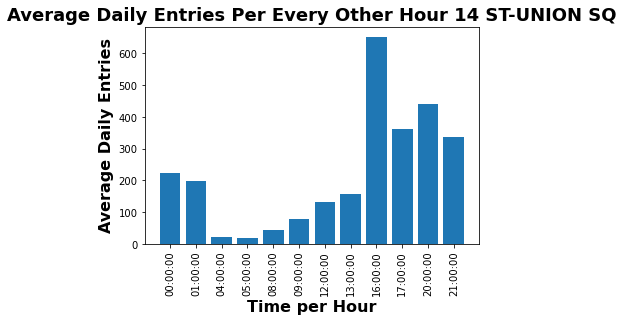

In [52]:
station3=turn_clean.groupby(['STATION','DATE','WEEKDAY','TIME']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
station3['AVE_DAILY_ENTRIES']=station3['sum']/station3['count']
station3
#'14 ST-UNION SQ'
station3=station3[station3['WEEKDAY'].isin(weekdays)]
mask2=(station3['STATION']=='14 ST-UNION SQ') 
station3['NEW_DATE']=pd.to_datetime(station3['DATE'])
wash_station=station3[mask2]
wash_station.sort_values('TIME',inplace=True)

#fix time
wash_station.loc[(wash_station['TIME']=='07:39:43'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='10:18:27'),'TIME']='09:00:00'
wash_station.loc[(wash_station['TIME']=='10:19:55'),'TIME']='09:00:00'
wash_station.loc[(wash_station['TIME']=='11:06:40'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='14:34:53'),'TIME']='13:00:00'
wash_station.loc[(wash_station['TIME']=='16:05:09'),'TIME']='16:00:00'
wash_station.loc[(wash_station['TIME']=='16:08:20'),'TIME']='16:00:00'
wash_station.loc[(wash_station['TIME']=='18:33:34'),'TIME']='17:00:00'

date_mask= (wash_station['NEW_DATE']>= '2021-10-04') & (wash_station['NEW_DATE']<='2021-10-08')
#wash_station[(wash_station['TIME']=='21:00:00')&(wash_station['AVE_DAILY_ENTRIES']>500)]
time_mask=(wash_station['DATE']=="10/08/2021") & (wash_station['TIME']=='16:00:00')
outlier_time_mean=wash_station[date_mask].AVE_DAILY_ENTRIES.mean()
wash_station.loc[time_mask,'AVE_DAILY_ENTRIES']=outlier_time_mean

#2021-10-08 to 2021-07-23, 4971
plt.bar(wash_station['TIME'],wash_station['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=90)
plt.xlabel('Time per Hour', weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries Per Every Other Hour 14 ST-UNION SQ',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries Per Every Other Hour-ST-UNION SQ.jpg',bbox_inches='tight',dpi=300)

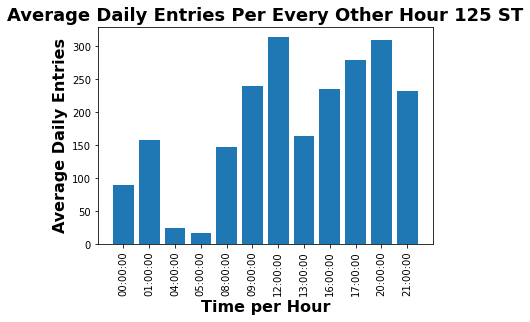

In [53]:
station3=turn_clean.groupby(['STATION','DATE','WEEKDAY','TIME']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
station3['AVE_DAILY_ENTRIES']=station3['sum']/station3['count']
station3
#'14 ST-UNION SQ'
station3=station3[station3['WEEKDAY'].isin(weekdays)]
mask2=(station3['STATION']=='125 ST') 
station3['NEW_DATE']=pd.to_datetime(station3['DATE'])
wash_station=station3[mask2]
wash_station.sort_values('TIME',inplace=True)

#fix time
wash_station.loc[(wash_station['TIME']=='03:00:00'),'TIME']='04:00:00'
wash_station.loc[(wash_station['TIME']=='05:00:01'),'TIME']='05:00:00'
wash_station.loc[(wash_station['TIME']=='07:00:00'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='07:39:56'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='07:41:03'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='07:42:39'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='07:46:33'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='07:48:00'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='08:49:12'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='11:00:00'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='11:42:38'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='11:42:38'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='11:50:14'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='15:00:00'),'TIME']='16:00:00'
wash_station.loc[(wash_station['TIME']=='15:26:02'),'TIME']='16:00:00'
wash_station.loc[(wash_station['TIME']=='15:59:29'),'TIME']='16:00:00'
wash_station.loc[(wash_station['TIME']=='16:04:16'),'TIME']='16:00:00'
wash_station.loc[(wash_station['TIME']=='19:00:00'),'TIME']='20:00:00'
wash_station.loc[(wash_station['TIME']=='20:05:11'),'TIME']='20:00:00'
wash_station.loc[(wash_station['TIME']=='21:22:17'),'TIME']='21:00:00'
wash_station.loc[(wash_station['TIME']=='23:00:00'),'TIME']='21:00:00'
wash_station.sort_values('TIME',inplace=True)

#check for outliers
wash_station[wash_station['AVE_DAILY_ENTRIES']>600]
date_mask= (wash_station['NEW_DATE']>= '2021-06-14') & (wash_station['NEW_DATE']<='2021-06-18')
date_mask1= (wash_station['NEW_DATE']>= '2021-11-01') & (wash_station['NEW_DATE']<='2021-11-05')
time_mask=(wash_station['DATE']=="06/18/2021") & (wash_station['TIME']=='20:00:00')
time_mask1=(wash_station['DATE']=="11/05/2021") & (wash_station['TIME']=='21:00:00')
outlier_time_mean=wash_station[date_mask].AVE_DAILY_ENTRIES.mean()
outlier_time_mean1=wash_station[date_mask].AVE_DAILY_ENTRIES.mean()
wash_station.loc[time_mask,'AVE_DAILY_ENTRIES']=outlier_time_mean
wash_station.loc[time_mask1,'AVE_DAILY_ENTRIES']=outlier_time_mean1

#2021-10-08 to 2021-07-23, 4971
plt.bar(wash_station['TIME'],wash_station['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=90)
plt.xlabel('Time per Hour', weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries Per Every Other Hour 125 ST',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries Per Every Other Hour-125 ST.jpg',bbox_inches='tight',dpi=300)

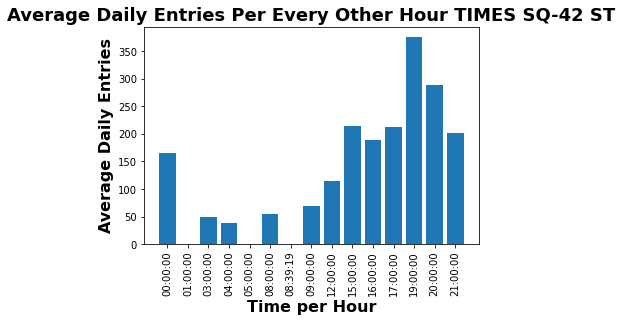

In [54]:
station3=turn_clean.groupby(['STATION','DATE','WEEKDAY','TIME']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
station3['AVE_DAILY_ENTRIES']=station3['sum']/station3['count']
station3
#'14 ST-UNION SQ'
station3=station3[station3['WEEKDAY'].isin(weekdays)]
mask2=(station3['STATION']=='TIMES SQ-42 ST') 
station3['NEW_DATE']=pd.to_datetime(station3['DATE'])
wash_station=station3[mask2]
#fix time
wash_station.loc[(wash_station['TIME']=='06:00:00'),'TIME']='05:00:00'
wash_station.loc[(wash_station['TIME']=='07:00:00'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='07:36:00'),'TIME']='08:00:00'
wash_station.loc[(wash_station['TIME']=='08:35:49'),'TIME']='09:00:00'
wash_station.loc[(wash_station['TIME']=='08:37:02'),'TIME']='09:00:00'
wash_station.loc[(wash_station['TIME']=='08:38:09'),'TIME']='09:00:00'
wash_station.loc[(wash_station['TIME']=='09:03:39'),'TIME']='09:00:00'
wash_station.loc[(wash_station['TIME']=='10:42:06'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='11:00:00'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='11:50:53'),'TIME']='12:00:00'
wash_station.loc[(wash_station['TIME']=='17:46:17'),'TIME']='17:00:00'
wash_station.loc[(wash_station['TIME']=='18:43:00'),'TIME']='17:00:00'
wash_station.loc[(wash_station['TIME']=='18:44:37'),'TIME']='17:00:00'
wash_station.loc[(wash_station['TIME']=='23:00:00'),'TIME']='21:00:00'
wash_station.sort_values('TIME',inplace=True)

wash_station[wash_station['AVE_DAILY_ENTRIES']>500]
date_mask= (wash_station['NEW_DATE']>= '2021-11-15') & (wash_station['NEW_DATE']<='2021-11-19')
time_mask=(wash_station['DATE']=="11/16/2021") & (wash_station['TIME']=='19:00:00')
outlier_time_mean=wash_station[date_mask].AVE_DAILY_ENTRIES.mean()
wash_station.loc[time_mask,'AVE_DAILY_ENTRIES']=outlier_time_mean

#2021-10-08 to 2021-07-23, 4971
plt.bar(wash_station['TIME'],wash_station['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=90)
plt.xlabel('Time per Hour', weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries Per Every Other Hour TIMES SQ-42 ST',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries Per Every Other Hour-TIMES SQ-42 ST.jpg',bbox_inches='tight',dpi=300)

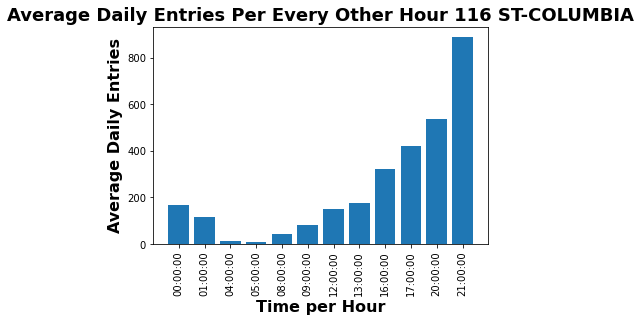

In [55]:
station3=turn_clean.groupby(['STATION','DATE','WEEKDAY','TIME']).DAILY_ENTRIES.agg(['count','sum']).reset_index()
station3['AVE_DAILY_ENTRIES']=station3['sum']/station3['count']
station3
#'14 ST-UNION SQ'
station3=station3[station3['WEEKDAY'].isin(weekdays)]
mask2=(station3['STATION']=='116 ST-COLUMBIA') 
station3['NEW_DATE']=pd.to_datetime(station3['DATE'])
wash_station=station3[mask2]
#fix time
wash_station.loc[(wash_station['TIME']=='14:26:44'),'TIME']='13:00:00'

wash_station.sort_values('TIME',inplace=True)


#date_mask= (wash_station['NEW_DATE']>= '2021-10-04') & (wash_station['NEW_DATE']<='2021-10-08')
#wash_station[(wash_station['TIME']=='21:00:00')&(wash_station['AVE_DAILY_ENTRIES']>500)]
#time_mask=(wash_station['DATE']=="10/08/2021") & (wash_station['TIME']=='16:00:00')
#outlier_time_mean=wash_station[date_mask].AVE_DAILY_ENTRIES.mean()
#wash_station.loc[time_mask,'AVE_DAILY_ENTRIES']=outlier_time_mean

#2021-10-08 to 2021-07-23, 4971
plt.bar(wash_station['TIME'],wash_station['AVE_DAILY_ENTRIES'])
plt.xticks(rotation=90)
plt.xlabel('Time per Hour', weight='bold',fontsize=16)
plt.ylabel('Average Daily Entries',weight='bold',fontsize=16)
plt.title('Average Daily Entries Per Every Other Hour 116 ST-COLUMBIA',weight='bold',fontsize=18)
plt.savefig('Average Daily Entries Per Every Other Hour-116 ST-COLUMBIA.jpg',bbox_inches='tight',dpi=300)

In [56]:
#look at total of foot traffic for outliers

In [57]:
#split the data into chunks in this case 5 chunks
#we will return a number where 20% of all other numbers fall below that number
turn_station2['Percentile']=turn_station2.quantile(q=0.20,axis=1,numeric_only=True,interpolation='linear')
turn_station2


,STATION,DATE,WEEKDAY,count,sum,AVE_DAILY_ENTRIES,Percentile
2,116 ST-COLUMBIA,05/31/2021,Monday,36,1363.0,37.861111,36.744444
1668,FLATBUSH AV-B.C,09/06/2021,Monday,120,3897.0,32.475000,67.485000
961,68ST-HUNTER CO,08/30/2021,Monday,112,10051.0,89.741071,98.644643
464,137 ST CITY COL,09/27/2021,Monday,60,5905.0,98.416667,75.366667
2165,W 4 ST-WASH SQ,08/02/2021,Monday,114,10924.0,95.824561,103.094737
...,...,...,...,...,...,...,...
965,68ST-HUNTER CO,09/03/2021,Friday,84,5703.0,67.892857,74.335714
468,137 ST CITY COL,10/01/2021,Friday,60,6307.0,105.116667,78.046667
2155,W 4 ST-WASH SQ,07/23/2021,Friday,114,13884.0,121.789474,117.115789
447,137 ST CITY COL,09/10/2021,Friday,60,5294.0,88.233333,71.293333


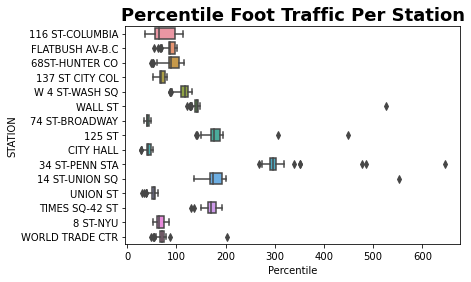

In [58]:
sns.boxplot(x=turn_station2['Percentile'],y=turn_station2['STATION'])
plt.title('Percentile Foot Traffic Per Station',weight='bold',fontsize=18)
plt.savefig('Percentile Foot Traffic Per Station.jpg',bbox_inches='tight',dpi=300)

In [59]:
#change average daily entries to total - use to drop 1-10% of outliers, 2 standard deviation, quartile percentage, projections
#3600s -> 3600 people * 24 -> theoretical limiations -> use as mask for total entries, drop before aggregating
#make visualizations less busy, easy to read, presentable
#take 2 graphs - station vs week day entries, and entries vs all weekdays
#1 time block many stations, 1 stations many timeblock
#focus on particular weekday after work timeblock, particular timeblock, for particular stations
#

In [51]:
import geopandas
import geoplot
import folium
path_to_data=geopandas.datasets.get_path('nybb')
gdf=geopandas.read_file(path_to_data)
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [52]:
gdf=gdf.set_index('BoroName')
gdf['area']=gdf.area
gdf['area']

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

<AxesSubplot:>

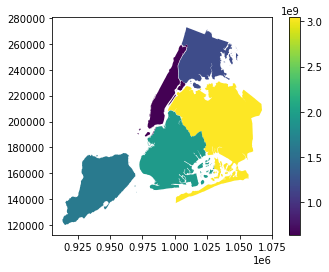

In [53]:
gdf.plot('area',legend=True)

In [54]:
gdf.explore(column='area',tooltip=['BoroName'],legend=False)

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [55]:
ny_map=folium.Map(location=[40.75,-74.0012],tiles='OpenStreetMap',zoom_start=12)
# WASH_SQ, UNION_SQ, 125_ST, ST_COLUMBIA, TIMES_SQ_42_ST
WASH_SQ=[40.7311,-74.0012]
UNION_SQ=[40.7345,-73.9903]
ST_125=[40.8044, -73.9374]
ST_COLUMBIA=[40.8081,-73.9639]
TIMES_SQ_42_ST=[40.7559,-73.9871]
marker_locations=[WASH_SQ,UNION_SQ,ST_125,TIMES_SQ_42_ST,ST_COLUMBIA]

for n in marker_locations:
    folium.CircleMarker(
        location=n,
        radius=50,
        color='blue',
        popup='station',
        fill_color='#FD8A6C'
    ).add_to(ny_map)
plt.savefig('ny_map_station.jpg')
ny_map

<Figure size 432x288 with 0 Axes>

In [58]:
ny_map=folium.Map(location=[40.8081,-73.9639],tiles='OpenStreetMap',zoom_start=15)
# WASH_SQ, UNION_SQ, 125_ST, ST_COLUMBIA, TIMES_SQ_42_ST
WASH_SQ=[40.7311,-74.0012]
UNION_SQ=[40.7345,-73.9903]
ST_125=[40.8044, -73.9374]
ST_COLUMBIA=[40.8081,-73.9639]
TIMES_SQ_42_ST=[40.7559,-73.9871]
marker_locations=[WASH_SQ,UNION_SQ,ST_125,TIMES_SQ_42_ST,ST_COLUMBIA]

for n in marker_locations:
    folium.CircleMarker(
        location=n,
        radius=50,
        color='blue',
        popup='station',
        fill_color='#FD8A6C'
    ).add_to(ny_map)
plt.savefig('ny_map_station_closeup.jpg')
ny_map

<Figure size 432x288 with 0 Axes>